In [21]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning

#and here is our data directiory
data_folder = '../../data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
sales = pd.read_csv(data_folder+'EXTR_RPSale_2019.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
parcels = pd.read_csv(data_folder+'EXTR_Parcel_2019.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
res_bldg = pd.read_csv(data_folder+'EXTR_ResBldg_2019.csv', dtype={'Major':'string', 'Minor':'string', 'PIN':'string'})

In [12]:
sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A ...,SEITZ ANDREW+MODELSKI EVE ...,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A ...,STONE AVENUE HOUSE LLC ...,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT ...,TALOFA LLC ...,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC ...,RUSSELL ALBERT ...,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO ...,STOECKMANN DOUGLAS A ...,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER ...,SAYAH MICHAEL+PRIYA ...,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M ...,PEDERSEN MICHAEL J ...,11,6,15,N,N,N,N,1,8,,3023000320


In [13]:
only_sales = sales[(sales['SaleReason']==1)|(sales['SaleReason']==18)]
only_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A ...,SEITZ ANDREW+MODELSKI EVE ...,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A ...,STONE AVENUE HOUSE LLC ...,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT ...,TALOFA LLC ...,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC ...,RUSSELL ALBERT ...,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO ...,STOECKMANN DOUGLAS A ...,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER ...,SAYAH MICHAEL+PRIYA ...,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M ...,PEDERSEN MICHAEL J ...,11,6,15,N,N,N,N,1,8,,3023000320


In [14]:
res_sales= only_sales[(only_sales['PropertyClass'] == 7)|(only_sales['PropertyClass'] == 8)]
res_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A ...,SEITZ ANDREW+MODELSKI EVE ...,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A ...,STONE AVENUE HOUSE LLC ...,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT ...,TALOFA LLC ...,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC ...,RUSSELL ALBERT ...,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO ...,STOECKMANN DOUGLAS A ...,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER ...,SAYAH MICHAEL+PRIYA ...,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M ...,PEDERSEN MICHAEL J ...,11,6,15,N,N,N,N,1,8,,3023000320


In [15]:
no_zeros = res_sales[res_sales['SalePrice']!=0]
no_zeros

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A ...,SEITZ ANDREW+MODELSKI EVE ...,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT ...,TALOFA LLC ...,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH ...,MARTINEZ JAVIER JIMENEZ ...,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR ...,SENGUPTA RAJIV+JENEA ...,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC ...,RUSSELL ALBERT ...,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO ...,STOECKMANN DOUGLAS A ...,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER ...,SAYAH MICHAEL+PRIYA ...,11,6,3,N,N,N,N,1,8,,6150200505


In [16]:
z = np.abs(stats.zscore(no_zeros.SalePrice))
no_outliers = no_zeros[z < 3]

no_outliers

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A ...,SEITZ ANDREW+MODELSKI EVE ...,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT ...,TALOFA LLC ...,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH ...,MARTINEZ JAVIER JIMENEZ ...,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR ...,SENGUPTA RAJIV+JENEA ...,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC ...,RUSSELL ALBERT ...,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO ...,STOECKMANN DOUGLAS A ...,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER ...,SAYAH MICHAEL+PRIYA ...,11,6,3,N,N,N,N,1,8,,6150200505


In [17]:
cor_df = pd.merge(no_outliers, res_bldg, on='PIN', how='inner', suffixes=('_sales', '_res'))
cor_df 

,Unnamed: 0_sales,ExciseTaxNbr,Major_sales,Minor_sales,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN,Unnamed: 0_res,Major_res,Minor_res,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,3,N,N,N,N,1,8,,2130430120,149390,213043,0120,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,9406520630,488069,940652,0630,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A ...,SEITZ ANDREW+MODELSKI EVE ...,3,6,3,N,N,N,N,1,8,,1402810020,24064,140281,0020,1,1,27001 NE MILLER ST 98019,27001,,NE,MILLER,ST,,98019,1.0,7,0,1080,0,0,0,0,0,1080,0,0,0,0,400,,110,0,80,1,3,0,,3,0,0,2,1,0,0,0,1986,0,0,0,0,3,0
3,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT ...,TALOFA LLC ...,3,6,15,N,N,N,N,18,8,18 51 52,1245500098,5810,124550,0098,1,1,9823 FORBES CREEK DR 98033,9823,,,FORBES CREEK,DR,,98033,1.0,7,0,1140,0,0,0,0,0,1760,1030,620,6,410,100,,0,0,220,5,2,0,,3,0,1,1,0,1,0,0,1980,0,0,0,0,3,0
4,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH ...,MARTINEZ JAVIER JIMENEZ ...,3,6,3,N,N,N,N,1,8,,7973202320,377823,797320,2320,1,1,10246 5TH AVE SW 98146,10246,,,5TH,AVE,SW,98146,1.0,6,0,860,0,0,0,0,0,1240,380,380,6,0,0,,0,0,0,5,2,0,,3,1,1,1,1,0,0,0,1930,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28587,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR ...,SENGUPTA RAJIV+JENEA ...,3,6,24,N,N,N,N,18,8,12,9290850760,416400,929085,0760,1,1,10316 214TH AVE NE 98052,10316,,,214TH,AVE,NE,98052,1.0,10,0,2880,0,0,0,0,0,2880,0,0,0,0,870,,130,0,470,7,2,0,,4,1,0,2,2,0,0,0,1989,0,0,0,0,3,0
28588,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC ...,RUSSELL ALBERT ...,11,6,3,N,N,N,N,1,8,,4059400095,222599,405940,0095,1,1,11234 CORNELL AVE S 98178,11234,,,CORNELL,AVE,S,98178,1.0,6,0,1430,0,0,0,0,0,1430,0,0,0,0,0,,0,0,200,4,3,0,,4,1,0,2,1,0,0,0,1944,0,0,0,0,4,0
28589,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO ...,STOECKMANN DOUGLAS A ...,11,6,3,N,N,N,N,1,8,,3816700025,358894,381670,0025,1,1,18741 62ND AVE NE 98028,18741,,,62ND,AVE,NE,98028,1.0,8,0,1520,0,0,0,0,0,2270,1520,750,7,0,440,Y,0,0,450,5,1,0,,3,0,1,1,0,1,0,1,1958,0,0,0,0,3,0
28590,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER ...,SAYAH MICHAEL+PRIYA ...,11,6,3,N,N,N,N,1,8,,6150200505,332441,615020,0505,1,1,13522 BURKE AVE N 98133,13522,,,BUR

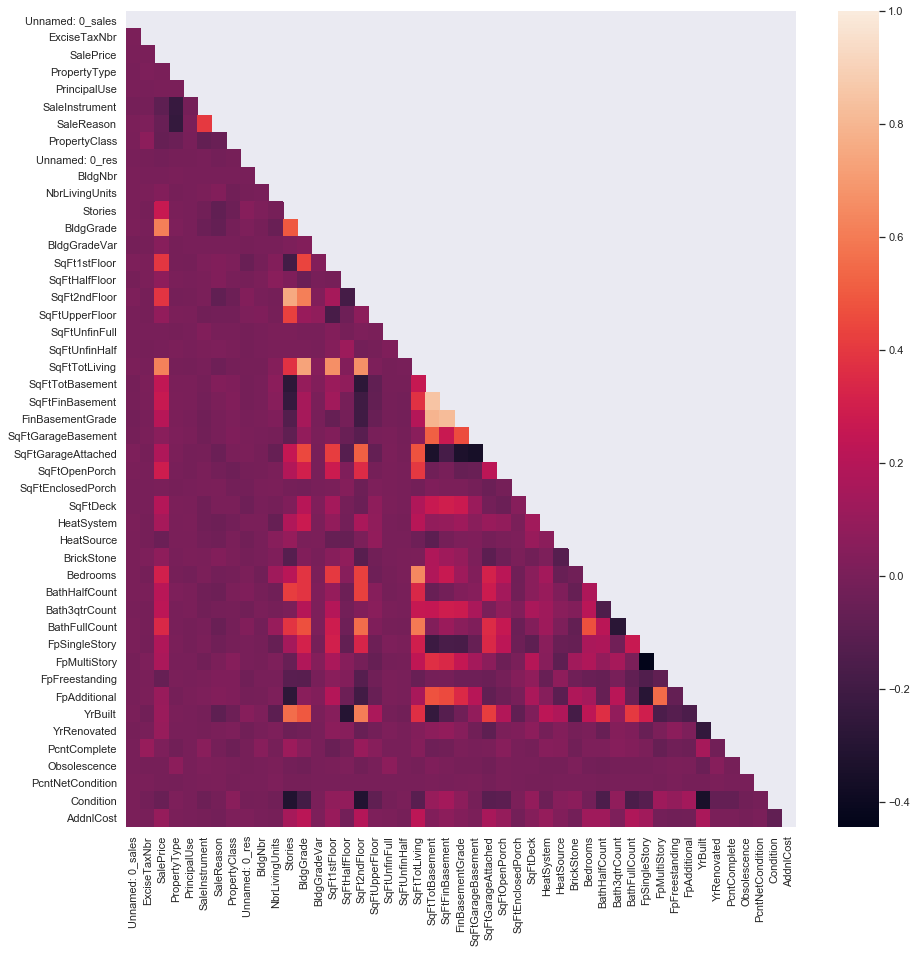

In [18]:
sns.set(rc={'figure.figsize':(15, 15)})
mask = np.triu(np.ones_like(cor_df.corr(), dtype=np.bool))
sns.heatmap(cor_df.corr(), mask=mask);
corrMatrix = cor_df.corr()

In [19]:
fsm_df = cor_df.loc[:, ['SalePrice', 'SqFtTotLiving']]
fsm_df

,SalePrice,SqFtTotLiving
0,560000,1930
1,435000,1975
2,450000,1080
3,193000,1760
4,540000,1240
...,...,...
28587,1205000,2880
28588,442000,1430
28589,680000,2270
28590,745000,2250


In [20]:
from src import cm_functions

SyntaxError: invalid syntax (cm_functions.py, line 10)

In [13]:
fsm = cm_functions.get_fsm(fsm_df)

Rsquared: 0.38517332816437344
BETA values:
Intercept        65262.999738
SqFtTotLiving      329.653106
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.791e+04
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:50:38   Log-Likelihood:            -4.0943e+05
No. Observations:               28592   AIC:                         8.189e+05
Df Residuals:                   28590   BIC:                         8.189e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P

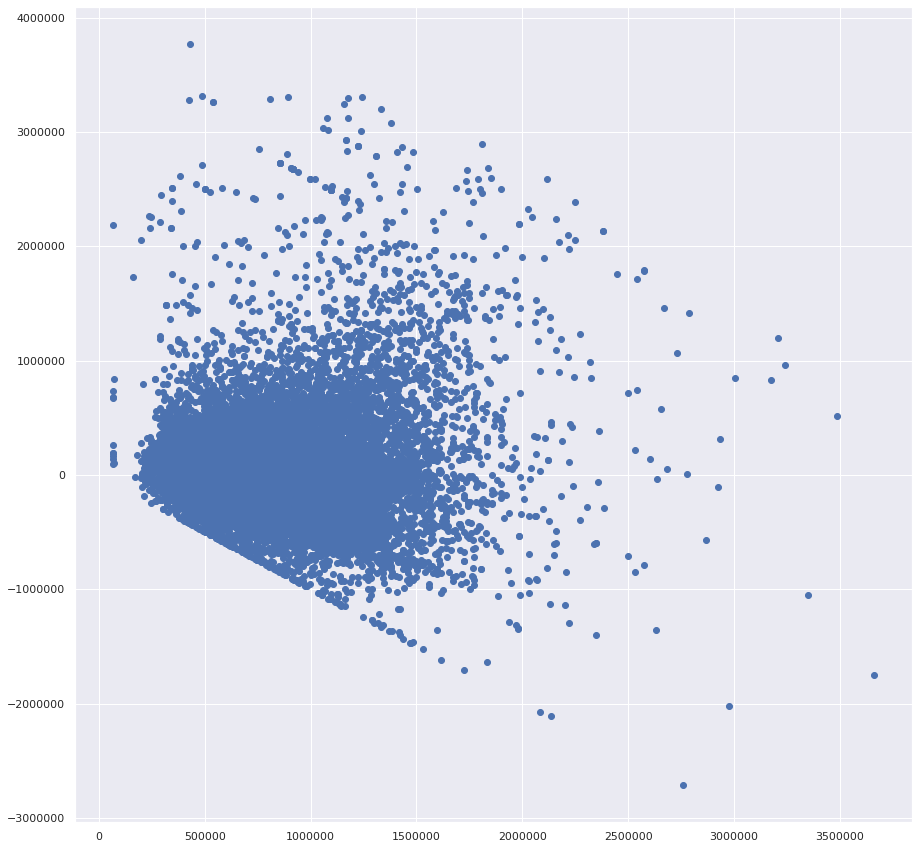

In [14]:
cm_functions.lr_homoscad(fsm)

In [15]:
cm_functions.lr_linear(fsm)

Rainbow statistic: 1.0376696009751156
Rainbow p-value: 0.013537346057821918


(1.0376696009751156, 0.013537346057821918)

0       -141493.494100
1       -281327.883865
2         28711.645904
3       -452452.466100
4         65967.148962
             ...      
28587    190336.055307
28588    -94666.941157
28589   -133575.550102
28590    -61982.487984
28591    289768.347547
Length: 28592, dtype: float64

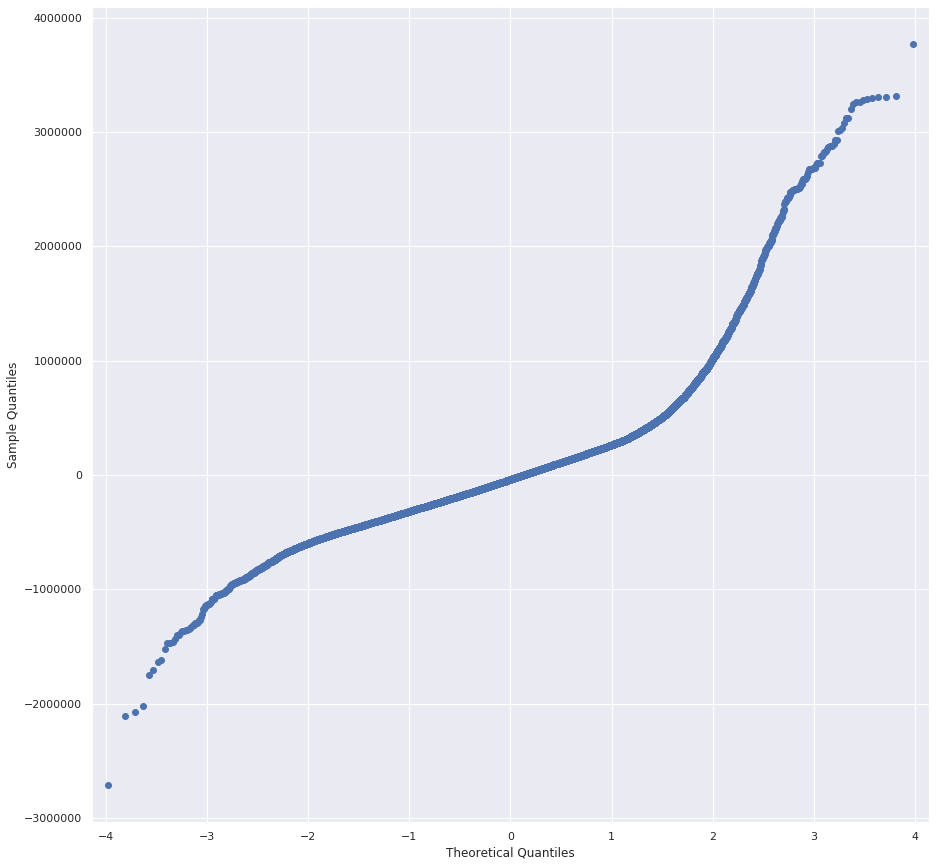

In [16]:
cm_functions.lr_normality(fsm)